In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sdss-query-logs/logs/sdsslog_sql_2024.12.14.log
/kaggle/input/sdss-query-logs/logs/sdsslog_sql_2025.05.17.log
/kaggle/input/sdss-query-logs/logs/sdsslog_sql_2023.12.14.log


In [1]:
!pip install sql-metadata

In [6]:
import re
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sql_metadata import Parser
from tqdm import tqdm

In [5]:
tqdm.pandas()

In [7]:
with open("/kaggle/input/sdss-query-logs/logs/sdsslog_sql_2023.12.14.log", "r", encoding="utf-8", errors="ignore") as f:
    lines = f.readlines()

In [8]:
clean_rows = []
with open("/kaggle/input/sdss-query-logs/logs/sdsslog_sql_2023.12.14.log", "r", encoding="utf-8", errors="ignore") as f:
    reader = csv.reader(f, delimiter=",", quotechar='"')
    for row in reader:
        if len(row) == 21:   
            clean_rows.append(row)
        else:
            pass

print("Clean rows:", len(clean_rows))

Clean rows: 562797


In [9]:
columns = ["yy","mm","dd","hh","mi","ss","seq","theTime","logID","clientIP",
           "requestor","server","dbname","access","elapsed","busy","rows",
           "statement","error","errorMessage","isvisible"]

df_2023 = pd.DataFrame(clean_rows[1:], columns=columns)

In [10]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562796 entries, 0 to 562795
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   yy            562796 non-null  object
 1   mm            562796 non-null  object
 2   dd            562796 non-null  object
 3   hh            562796 non-null  object
 4   mi            562796 non-null  object
 5   ss            562796 non-null  object
 6   seq           562796 non-null  object
 7   theTime       562796 non-null  object
 8   logID         562796 non-null  object
 9   clientIP      562796 non-null  object
 10  requestor     562796 non-null  object
 11  server        562796 non-null  object
 12  dbname        562796 non-null  object
 13  access        562796 non-null  object
 14  elapsed       562796 non-null  object
 15  busy          562796 non-null  object
 16  rows          562796 non-null  object
 17  statement     562796 non-null  object
 18  error         562796 non

In [11]:
df_2023.head()

,yy,mm,dd,hh,mi,ss,seq,theTime,logID,clientIP,...,server,dbname,access,elapsed,busy,rows,statement,error,errorMessage,isvisible
0,2023,12,14,23,59,57,2839344282,12/14/2023 11:59:57 PM,2081,172.23.27.6,...,SDSS3U,BestDR8,public,3.437,0.104,915,"SELECT str(p.ra,13,8) as ra, str(p.dec,13,8)as...",0,,1
1,2023,12,14,23,59,56,2873073669,12/14/2023 11:59:56 PM,2177,128.220.233.214,...,SDSS4H,BestDR16,SkyserverWS.SearchTools.RadialSearch,0.013,1E-3,10,"SELECT TOP 10 p.objid,\n p.run, p.rerun, p.cam...",0,,1
2,2023,12,14,23,59,54,2839344284,12/14/2023 11:59:55 PM,2081,172.23.38.130,...,SDSS3U,BestDR8,public,6E-3,1E-3,1,SELECT top 1 '<a target=INFO href=http://skys...,0,,1
3,2023,12,14,23,59,54,2839344283,12/14/2023 11:59:55 PM,2081,172.23.27.4,...,SDSS3U,BestDR3,public,6E-3,0,1,SELECT top 1 '<a target=INFO href=http://skys...,0,,1
4,2023,12,14,23,59,52,2839344286,12/14/2023 11:59:52 PM,2081,172.23.27.4,...,SDSS3U,BestDR1,public,0.996,2E-3,1,"SELECT top 1 p.objID, p.run, p.rerun, p.cam...",0,,1


In [12]:
unique_counts = df_2023.nunique()

print(unique_counts)

yy                   1
mm                   1
dd                   1
hh                  24
mi                  60
ss                  60
seq             562796
theTime          82704
logID               10
clientIP           112
requestor            8
server              36
dbname              34
access              21
elapsed           3623
busy               691
rows              2775
statement       437179
error                3
errorMessage         4
isvisible            1
dtype: int64


In [13]:
for col in df_2023.columns:
    print(f"{col}: {df_2023[col].nunique()} unique values")
    print(f"Examples: {df_2023[col].dropna().unique()[:5]}")
    print("----")

yy: 1 unique values
Examples: ['2023']
----
mm: 1 unique values
Examples: ['12']
----
dd: 1 unique values
Examples: ['14']
----
hh: 24 unique values
Examples: ['23' '22' '21' '20' '19']
----
mi: 60 unique values
Examples: ['59' '58' '57' '56' '55']
----
ss: 60 unique values
Examples: ['57' '56' '54' '52' '49']
----
seq: 562796 unique values
Examples: ['2839344282' '2873073669' '2839344284' '2839344283' '2839344286']
----
theTime: 82704 unique values
Examples: ['12/14/2023 11:59:57 PM' '12/14/2023 11:59:56 PM'
 '12/14/2023 11:59:55 PM' '12/14/2023 11:59:52 PM'
 '12/14/2023 11:59:53 PM']
----
logID: 10 unique values
Examples: ['2081' '2177' '2176' '2061' '2181']
----
clientIP: 112 unique values
Examples: ['172.23.27.6' '128.220.233.214' '172.23.38.130' '172.23.27.4'
 '172.23.55.1']
----
requestor: 8 unique values
Examples: ['skyserver.sdss.org' 'cas.sdss.org' ' skyserver.sdss.org/casjobs '
 'preprod.skyserver.sdss.org' 'www.skyserver.sdss.org']
----
server: 36 unique values
Examples: ['S

In [14]:
for col in ["yy","mm","dd","hh","mi","ss"]:
    df_2023[col] = pd.to_numeric(df_2023[col], errors="coerce")


df_2023 = df_2023.rename(columns={"yy": "year", "mm": "month", "dd": "day", 
                                  "hh": "hour", "mi": "minute", "ss": "second"})


df_2023["timestamp"] = pd.to_datetime(df_2023[["year","month","day","hour","minute","second"]], errors="coerce")

In [19]:
df_2023.head()

,year,month,day,hour,minute,second,seq,theTime,logID,clientIP,...,dbname,access,elapsed,busy,rows,statement,error,errorMessage,isvisible,timestamp
0,2023,12,14,23,59,57,2839344282,12/14/2023 11:59:57 PM,2081,172.23.27.6,...,BestDR8,public,3.437,0.104,915,"SELECT str(p.ra,13,8) as ra, str(p.dec,13,8)as...",0,,1,2023-12-14 23:59:57
1,2023,12,14,23,59,56,2873073669,12/14/2023 11:59:56 PM,2177,128.220.233.214,...,BestDR16,SkyserverWS.SearchTools.RadialSearch,0.013,0.001,10,"SELECT TOP 10 p.objid,\n p.run, p.rerun, p.cam...",0,,1,2023-12-14 23:59:56
2,2023,12,14,23,59,54,2839344284,12/14/2023 11:59:55 PM,2081,172.23.38.130,...,BestDR8,public,0.006,0.001,1,SELECT top 1 '<a target=INFO href=http://skys...,0,,1,2023-12-14 23:59:54
3,2023,12,14,23,59,54,2839344283,12/14/2023 11:59:55 PM,2081,172.23.27.4,...,BestDR3,public,0.006,0.000,1,SELECT top 1 '<a target=INFO href=http://skys...,0,,1,2023-12-14 23:59:54
4,2023,12,14,23,59,52,2839344286,12/14/2023 11:59:52 PM,2081,172.23.27.4,...,BestDR1,public,0.996,0.002,1,"SELECT top 1 p.objID, p.run, p.rerun, p.cam...",0,,1,2023-12-14 23:59:52


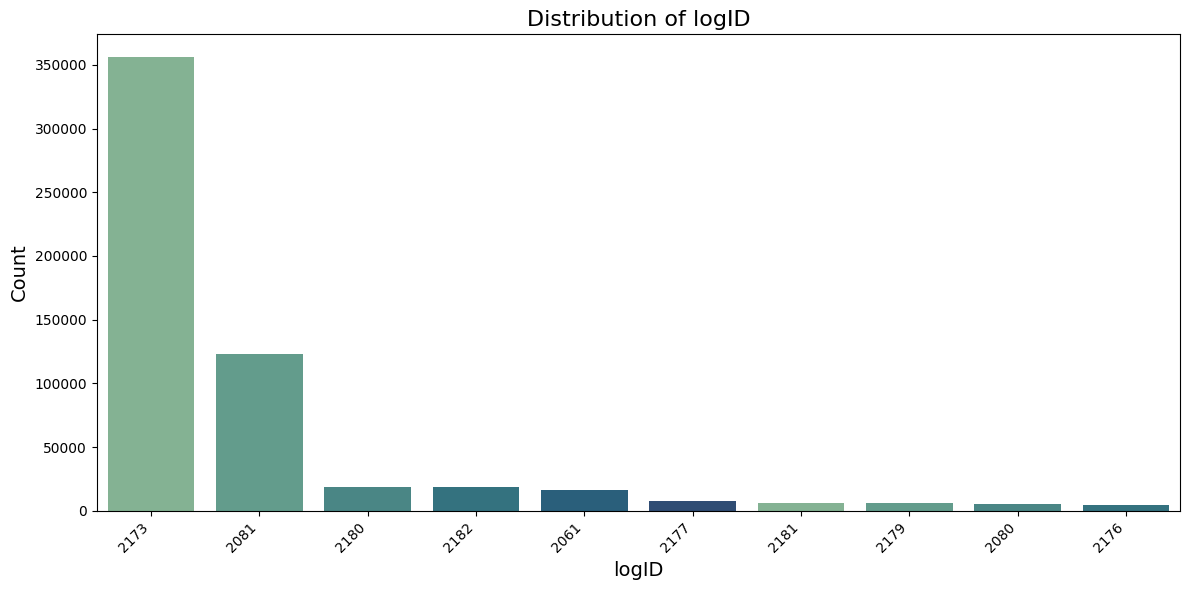

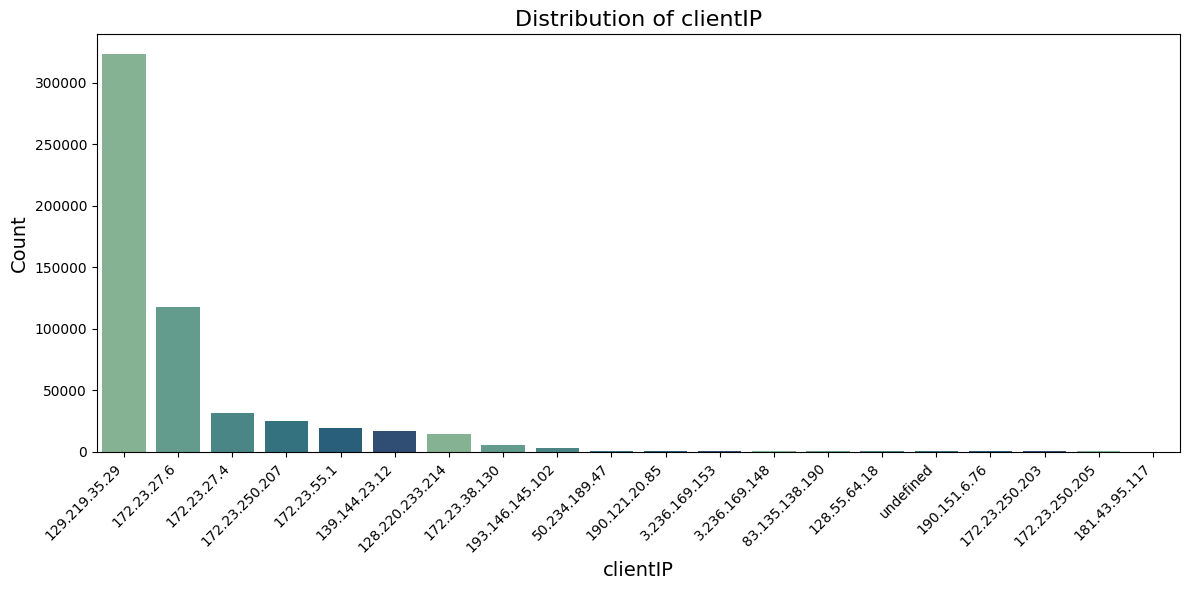

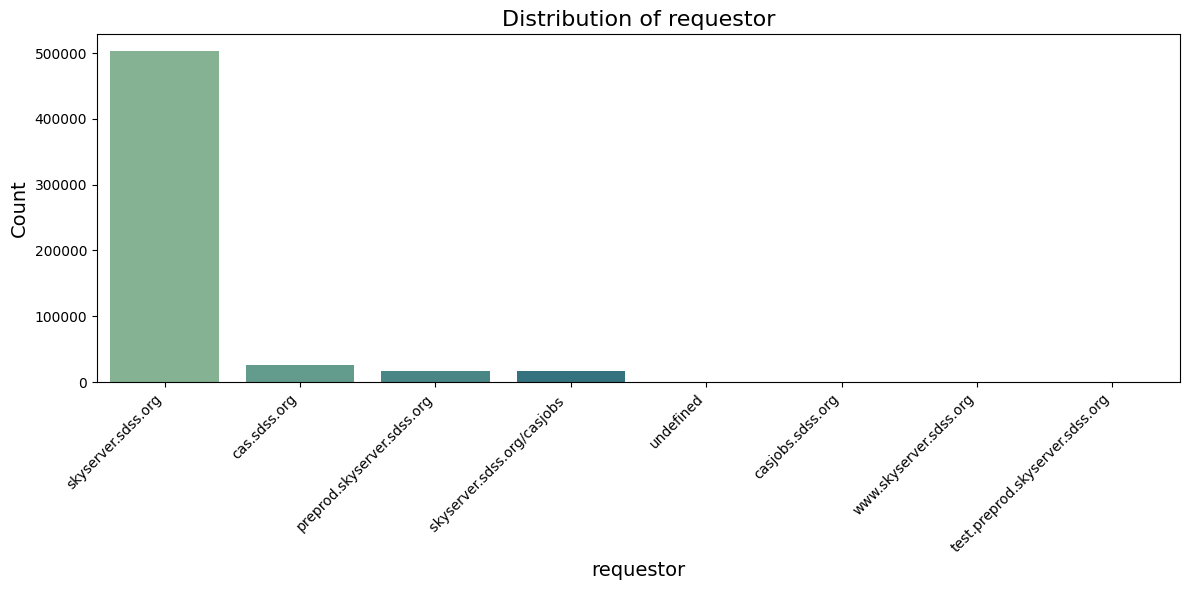

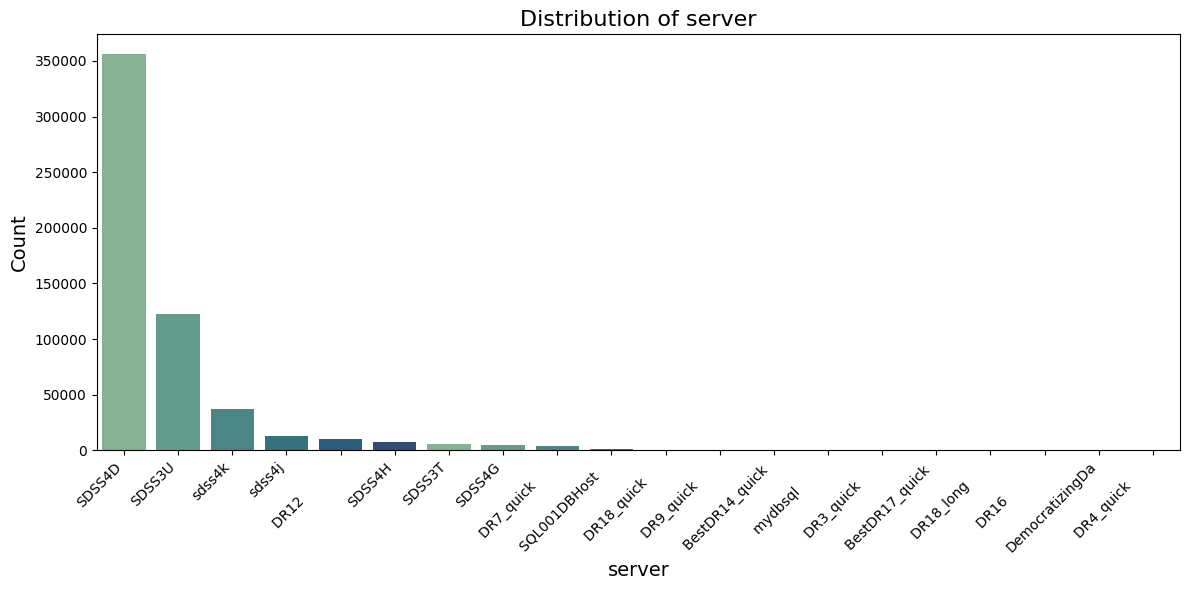

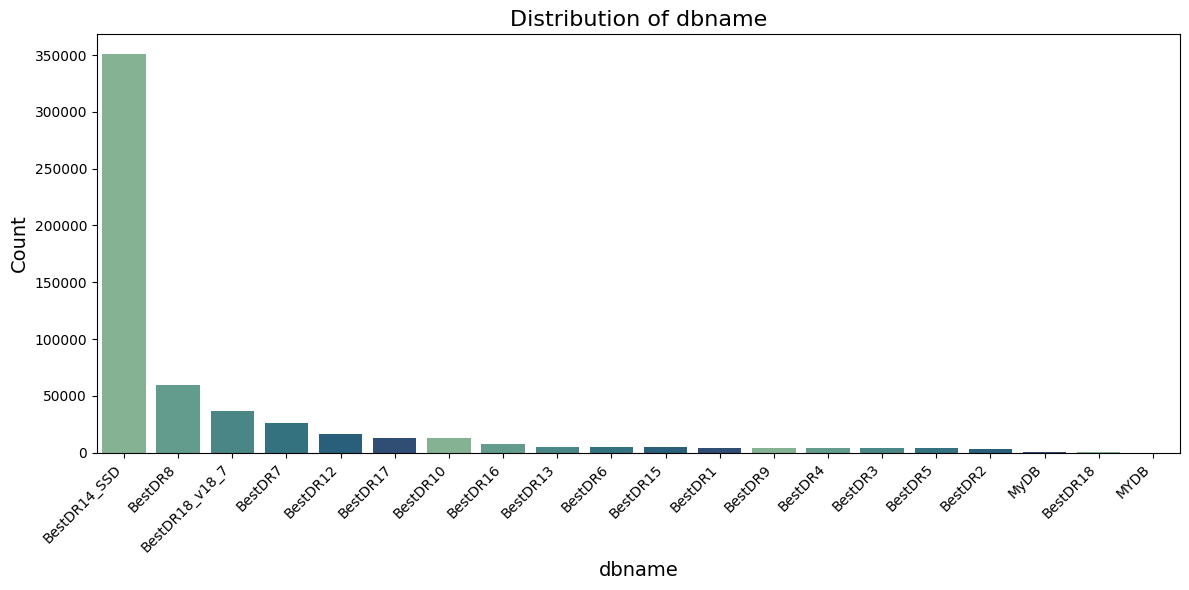

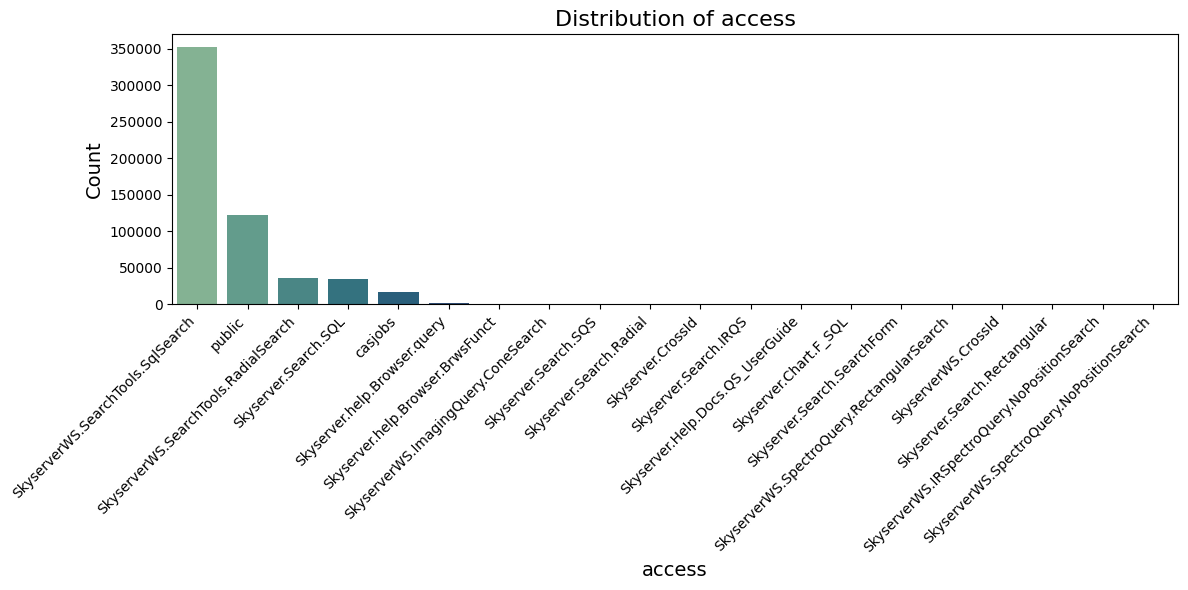

In [22]:
features = ["logID", "clientIP", "requestor", "server", "dbname", "access"]

palette = sns.color_palette("crest", as_cmap=False)

for col in features:
    plt.figure(figsize=(12,6))
    # sns.countplot(data=df_2023, x=col, palette=palette, order=df_2023[col].value_counts().index)
    topN = 20
    sns.countplot(
        data=df_2023,
        x=col,
        palette=palette,
        order=df_2023[col].value_counts().index[:topN]
    )
    
    plt.title(f"Distribution of {col}", fontsize=16)
    plt.xticks(rotation=45, ha="right")
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.tight_layout()
    plt.show()

In [16]:
df_queries = pd.DataFrame()
df_queries = df_2023.copy()

In [17]:
def get_query_type_sql_metadata(query: str) -> str:
    if not isinstance(query, str) or query.strip() == "":
        return "UNKNOWN"
    try:
        return Parser(query).query_type or "UNKNOWN"
    except:
        return "UNKNOWN"

def get_tables_sql_metadata(query: str):
    if not isinstance(query, str):
        return []
    try:
        return Parser(query).tables or []
    except:
        return []

def get_columns_sql_metadata(query: str):
    if not isinstance(query, str):
        return []
    try:
        return Parser(query).columns or []
    except:
        return []

def get_joins_sql_metadata(query: str):
    if not isinstance(query, str):
        return []
    try:
        return Parser(query).joins or []
    except:
        return []

def normalize_query(query: str) -> str:
    if not isinstance(query, str):
        return ""
    q = query.lower()
    q = re.sub(r"'[^']*'", "?", q)         
    q = re.sub(r"\b\d+(\.\d+)?\b", "?", q) 
    q = re.sub(r"\s+", " ", q)            
    return q.strip()

In [ ]:
df_queries["query_type"] = df_queries["statement"].progress_apply(get_query_type_sql_metadata)
df_queries["tables"] = df_queries["statement"].progress_apply(get_tables_sql_metadata)
df_queries["num_tables"] = df_queries["tables"].progress_apply(len)
df_queries["columns"] = df_queries["statement"].progress_apply(get_columns_sql_metadata)
df_queries["joins"] = df_queries["statement"].progress_apply(get_joins_sql_metadata)
df_queries["num_joins"] = df_queries["joins"].progress_apply(len)
df_queries["query_length"] = df_queries["statement"].progress_apply(lambda x: len(str(x).split()))
df_queries["query_template"] = df_queries["statement"].progress_apply(normalize_query)

 40%|███▉      | 222866/562796 [13:59<18:34, 304.97it/s]  

In [ ]:
df_queries.to_csv("sdss_query_features_full.csv", index=False)
print("Query features saved to sdss_query_features_full.csv")

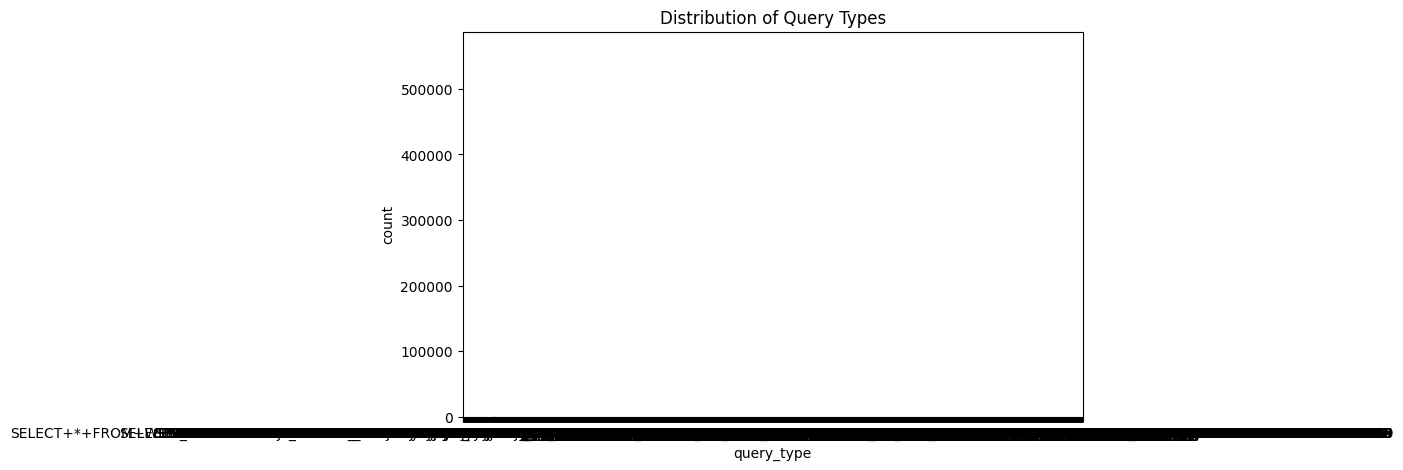

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


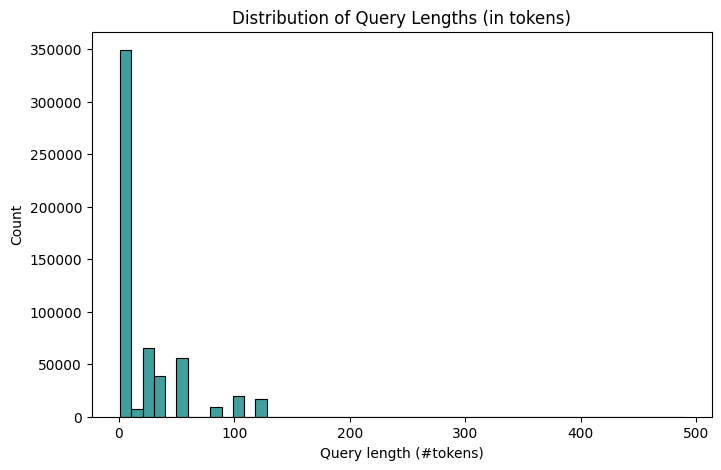

In [ ]:
# plt.figure(figsize=(8,5))
# sns.countplot(data=df_2023, x="query_type", palette="crest")
# plt.title("Distribution of Query Types")
# plt.show()

# plt.figure(figsize=(8,5))
# sns.histplot(df_2023["query_length"], bins=50, color="teal")
# plt.title("Distribution of Query Lengths (in tokens)")
# plt.xlabel("Query length (#tokens)")
# plt.show()

# plt.figure(figsize=(8,5))
# sns.countplot(data=df_2023, x="num_joins", palette="crest")
# plt.title("Distribution of Number of Joins per Query")
# plt.show()

# all_tables = sum(df_2023["tables"].tolist(), [])  
# table_counts = Counter(all_tables).most_common(10)

# tables_df = pd.DataFrame(table_counts, columns=["table","count"])
# plt.figure(figsize=(10,5))
# sns.barplot(data=tables_df, x="table", y="count", palette="crest")
# plt.title("Top 10 Most Frequently Queried Tables")
# plt.xticks(rotation=45)
# plt.show()